In [33]:
import numpy as np
from LBL_funcs_fullSpectrum import *
from LBL_funcs_inclined import *
import matplotlib.pyplot as plt

In [55]:
channels_H8 = [
# channel num # center(um), spatial reso(km), bandwidth (nm)
        [1, 0.455, 1, 50],
        [2, 0.51000, 1, 20],
        [3, 0.645, 0.5, 30],
        [4, 0.86, 1,20,],
        [5, 1.610, 2,20],
        [6, 2.26,2,20]
        ]

In [6]:
dnu = 3 # spectral resolution 0.1 is enough, 0.01 is too fine, especially for cloudy periods
nu=np.arange(2500,35000,dnu)

In [7]:
data = np.genfromtxt('data/profiles/SolarTOA.csv', delimiter=',')
ref_lam = data[:, 0]  # in unit of um
ref_E = data[:, 1]  # in unit of W/m2 um
ref_E_nu=-ref_E*ref_lam**2/1e4
F_dw_os = -np.interp(-nu,-1e4/ref_lam, ref_E_nu) # in wavenumber basis

1 0.455 3678.4217230499103
2 0.51 3170.7255847443275
3 0.645 2450.512013156948
4 0.86 1491.1657494858255
5 1.61 231.2652016013589
6 2.26 0.0


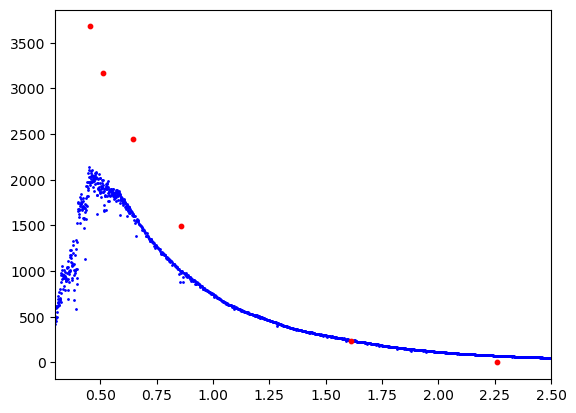

In [58]:
band_flux =[]
plt.scatter(ref_lam,ref_E,s=1,c='b',label='F_dw_os')
for channel, lmbda_center, spatial, band_width in channels_H8:
    bw = band_width/1000 # nm -> um
    mask = (ref_lam > lmbda_center-bw) & (ref_lam < 2+bw)
    flux_lam = ref_E[mask]
    lam_ = ref_lam[mask]
    a = np.trapz(flux_lam,lam_) * np.pi
    band_flux.append(a)
    print(channel,lmbda_center,a)
    plt.scatter(lmbda_center,a,s=10,c='r')
plt.xlim(0.3,2.5)
plt.show()

In [ ]:

plt.scatter(lmbda_center,band_flux)

In [32]:
band_flux

[1143.4650000000001,
 1009.2733000000001,
 790.3006999999999,
 478.81280000000004,
 73.61399999999996,
 0.0]